In [1]:
from sklearn.preprocessing import LabelEncoder
labels = ['entertainment', 'food', 'travel', 'health and lifestyle', 'mom and children', 'fashion', 'tech', 'sports', 'art', 'gaming']

label_encoder = LabelEncoder()
label_encoder.fit(labels)

LabelEncoder()

In [2]:
from sklearn.preprocessing import TargetEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
from consts import *

FILENAME = get_filename(TT.ALL, EMBED_PROVIDER.DISTILBERT, MEAN_METHOD.MEAN)
print(FILENAME)

df_embeds = pd.read_parquet(FILENAME)
df_train_all = pd.read_parquet("data/training-dataset.parquet")

df_train = pd.merge(
    df_embeds,
    df_train_all[["username", "category_enum", "label"]],
    how="left",
    on="username",
)
df_train = df_train.dropna(subset=["label"])
df_train = df_train.drop(columns=["username"])
df_train["category_enum"] = df_train["category_enum"].fillna("Missing")

df_train


df_train["target"] = label_encoder.transform(df_train["label"])
df_train = df_train.drop(columns=["label"])


X = df_train.drop(columns=["target"])
y = df_train[["target"]]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


encoder = TargetEncoder()
cat_encoded_train = encoder.fit_transform(
    X_train["category_enum"].to_numpy().reshape(-1, 1), y_train["target"].tolist()
)
X_train["category_encoded"] = [row.tolist() for row in cat_encoded_train]
X_train = X_train[["embeds_wavg", "category_encoded"]]

X_train = pd.concat(
    [
        pd.DataFrame(X_train["category_encoded"].tolist()),
        pd.DataFrame(X_train["embeds_wavg"].tolist()),
    ],
    axis=1,
)


cat_encoded_test = encoder.transform(X_test["category_enum"].to_numpy().reshape(-1, 1))
X_test["category_encoded"] = [row.tolist() for row in cat_encoded_test]
X_test = pd.concat(
    [
        pd.DataFrame(X_test["category_encoded"].tolist()),
        pd.DataFrame(X_test["embeds_wavg"].tolist()),
    ],
    axis=1,
)

X_train, X_test, y_train, y_test = (
    X_train.to_numpy(),
    X_test.to_numpy(),
    y_train.to_numpy(),
    y_test.to_numpy(),
)

data/embeddings/distilbert/ue_em_mean.parquet


In [7]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

/home/tagrikli/Desktop/Academic/Courses/CS412   - Machine Learning/Term Project/Data Modelling/env/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)



Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.30      0.35        66
           1       0.32      0.38      0.35        92
           2       0.61      0.58      0.59        99
           3       0.82      0.87      0.85       161
           4       0.00      0.00      0.00         5
           5       0.55      0.69      0.61       144
           6       0.41      0.31      0.35        39
           7       0.76      0.71      0.74        35
           8       0.69      0.74      0.71        95
           9       0.78      0.50      0.61        86

    accuracy                           0.61       822
   macro avg       0.54      0.51      0.52       822
weighted avg       0.61      0.61      0.61       822


Additional Metrics:
Accuracy: 0.6107
Macro F1: 0.5160
Weighted F1: 0.6057
Macro Precision: 0.5358
Macro Recall: 0.5082


/home/tagrikli/Desktop/Academic/Courses/CS412   - Machine Learning/Term Project/Data Modelling/env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/tagrikli/Desktop/Academic/Courses/CS412   - Machine Learning/Term Project/Data Modelling/env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/tagrikli/Desktop/Academic/Courses/CS412   - Machine Learning/Term Project/Data Modelling/env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: 

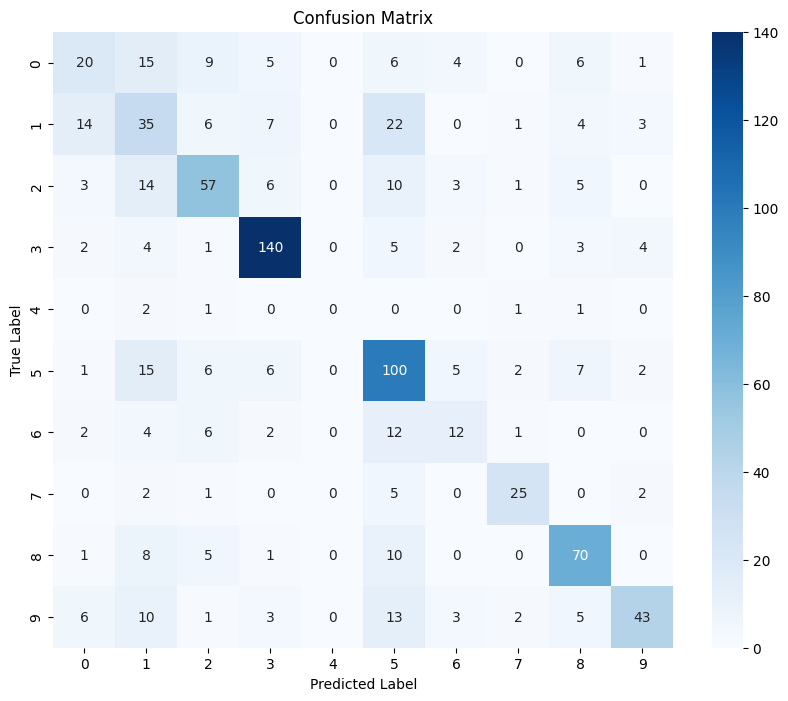

In [8]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Print detailed metrics
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate additional metrics
accuracy = accuracy_score(y_test, y_pred)
macro_f1 = f1_score(y_test, y_pred, average='macro')
weighted_f1 = f1_score(y_test, y_pred, average='weighted')
macro_precision = precision_score(y_test, y_pred, average='macro')
macro_recall = recall_score(y_test, y_pred, average='macro')

print("\nAdditional Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Macro F1: {macro_f1:.4f}")
print(f"Weighted F1: {weighted_f1:.4f}")
print(f"Macro Precision: {macro_precision:.4f}")
print(f"Macro Recall: {macro_recall:.4f}")

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()



In [13]:
label_encoder.inverse_transform([9,5, 0 ,1, 5, 4])

array(['travel', 'health and lifestyle', 'art', 'entertainment',
       'health and lifestyle', 'gaming'], dtype='<U20')

In [14]:
from sklearn.preprocessing import LabelEncoder, TargetEncoder
from sklearn.model_selection import train_test_split

df_train = pd.merge(df_embeds, df_train_all[['username','category_enum','label']], how='left', on='username')
df_train = df_train.dropna(subset=['label'])
df_train = df_train.drop(columns=['username'])
df_train['category_enum'] = df_train['category_enum'].fillna('Missing')



labels = ['entertainment', 'food', 'travel', 'health and lifestyle', 'mom and children', 'fashion', 'tech', 'sports', 'art', 'gaming']



label_encoder = LabelEncoder()
label_encoder.fit(labels)

print(label_encoder.transform(['art']))

df_train['target'] = label_encoder.transform(df_train['label'])
df_train = df_train.drop(columns=['label'])


X = df_train.drop(columns=['target'])
y = df_train[['target']]
X_train = X
y_train = y


encoder = TargetEncoder()
cat_encoded_train = encoder.fit_transform(X_train["category_enum"].to_numpy().reshape(-1,1), y_train['target'].tolist())
X_train['category_encoded'] = [row.tolist() for row in cat_encoded_train]
X_train = X_train[['embeds_wavg','category_encoded']]

X_train = pd.concat([pd.DataFrame(X_train['category_encoded'].tolist()), pd.DataFrame(X_train['embeds_wavg'].tolist())],axis=1)



X_train, y_train = X_train.to_numpy(), y_train.to_numpy()


#model = fit_predict_eval(X_train, y_train)


[0]
